In [375]:
import numpy
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [376]:
dataset = pandas.read_csv('prepared_data.csv')
dataset.head(10)

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,1,2,3,4,5,6,7,8
0,0,0.209515,0.163322,0.305476,0.05,0.678571,0.516995,1,1,1,0,0,1,0,0,0,0,0
1,1,0.176091,0.000000,0.000000,0.05,0.750000,0.516995,1,0,1,0,0,0,0,0,1,0,0
2,2,0.408240,0.288130,0.347262,0.05,0.821429,0.229966,1,1,1,0,0,1,0,0,0,0,0
3,3,0.278754,0.195649,0.238705,0.05,0.750000,0.516995,1,0,1,1,0,0,0,0,0,0,0
4,4,0.819544,0.592565,0.652738,0.30,0.535714,0.516995,0,1,1,0,0,1,0,0,0,0,0
5,5,0.437751,0.346509,0.496588,0.20,0.571429,0.516995,1,1,1,0,0,0,0,0,0,0,1
6,6,0.292256,0.174189,0.283792,0.05,0.321429,0.679257,0,0,1,0,0,0,0,0,0,0,1
7,7,0.245513,0.130147,0.215239,0.05,0.428571,0.388298,1,1,0,0,0,0,1,0,0,0,0
8,8,0.653213,0.384155,0.593649,0.20,0.428571,0.388298,1,1,1,0,0,1,0,0,0,0,0
9,9,0.447158,0.438901,0.513548,0.25,0.692857,0.679257,1,0,1,0,0,0,0,1,0,0,0


In [377]:
X = dataset.iloc[: , 2:].values
Y = dataset['price'].values

In [378]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3)

In [379]:
input_layer_size = 16

first_hidden_layer_size = 50 
second_hidden_layer_size = 30
third_hidden_layer_size = 18

output_layer_size = 1 

epochs_number = 100
batch_size = 32

In [380]:
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(third_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [381]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 50)                850       
_________________________________________________________________
dense_60 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_61 (Dense)             (None, 18)                558       
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 19        
Total params: 2,957
Trainable params: 2,957
Non-trainable params: 0
_________________________________________________________________


In [382]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [383]:
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1428 samples, validate on 612 samples
Epoch 1/100
1428/1428 [==============================] - 0s 241us/step - loss: 0.1116 - mean_absolute_error: 0.2487 - mean_squared_error: 0.1116 - val_loss: 0.0192 - val_mean_absolute_error: 0.1069 - val_mean_squared_error: 0.0192
Epoch 2/100
1428/1428 [==============================] - 0s 96us/step - loss: 0.0166 - mean_absolute_error: 0.0976 - mean_squared_error: 0.0166 - val_loss: 0.0133 - val_mean_absolute_error: 0.0885 - val_mean_squared_error: 0.0133
Epoch 3/100
1428/1428 [==============================] - 0s 136us/step - loss: 0.0108 - mean_absolute_error: 0.0786 - mean_squared_error: 0.0108 - val_loss: 0.0088 - val_mean_absolute_error: 0.0705 - val_mean_squared_error: 0.0088
Epoch 4/100
1428/1428 [==============================] - 0s 103us/step - loss: 0.0069 - mean_absolute_error: 0.0619 - mean_squared_error: 0.0069 - val_loss: 0.0054 - val_mean_absolute_error: 0.0569 - val_mean_squared_error: 0.0054
Epoch 5/100
1428/1428 [=======

1428/1428 [==============================] - 0s 81us/step - loss: 0.0033 - mean_absolute_error: 0.0416 - mean_squared_error: 0.0033 - val_loss: 0.0042 - val_mean_absolute_error: 0.0507 - val_mean_squared_error: 0.0042
Epoch 37/100
1428/1428 [==============================] - 0s 101us/step - loss: 0.0033 - mean_absolute_error: 0.0414 - mean_squared_error: 0.0033 - val_loss: 0.0040 - val_mean_absolute_error: 0.0480 - val_mean_squared_error: 0.0040
Epoch 38/100
1428/1428 [==============================] - 0s 75us/step - loss: 0.0032 - mean_absolute_error: 0.0410 - mean_squared_error: 0.0032 - val_loss: 0.0038 - val_mean_absolute_error: 0.0455 - val_mean_squared_error: 0.0038
Epoch 39/100
1428/1428 [==============================] - 0s 87us/step - loss: 0.0033 - mean_absolute_error: 0.0423 - mean_squared_error: 0.0033 - val_loss: 0.0038 - val_mean_absolute_error: 0.0459 - val_mean_squared_error: 0.0038
Epoch 40/100
1428/1428 [==============================] - 0s 120us/step - loss: 0.0032 -

1428/1428 [==============================] - 0s 82us/step - loss: 0.0029 - mean_absolute_error: 0.0395 - mean_squared_error: 0.0029 - val_loss: 0.0040 - val_mean_absolute_error: 0.0466 - val_mean_squared_error: 0.0040
Epoch 72/100
1428/1428 [==============================] - 0s 78us/step - loss: 0.0029 - mean_absolute_error: 0.0390 - mean_squared_error: 0.0029 - val_loss: 0.0039 - val_mean_absolute_error: 0.0466 - val_mean_squared_error: 0.0039
Epoch 73/100
1428/1428 [==============================] - 0s 91us/step - loss: 0.0029 - mean_absolute_error: 0.0394 - mean_squared_error: 0.0029 - val_loss: 0.0039 - val_mean_absolute_error: 0.0458 - val_mean_squared_error: 0.0039
Epoch 74/100
1428/1428 [==============================] - 0s 105us/step - loss: 0.0029 - mean_absolute_error: 0.0397 - mean_squared_error: 0.0029 - val_loss: 0.0040 - val_mean_absolute_error: 0.0472 - val_mean_squared_error: 0.0040
Epoch 75/100
1428/1428 [==============================] - 0s 82us/step - loss: 0.0028 - 

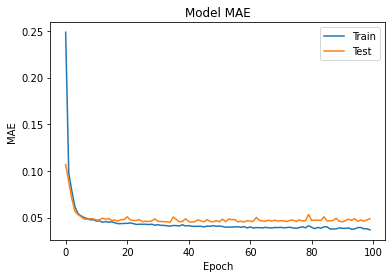

In [384]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

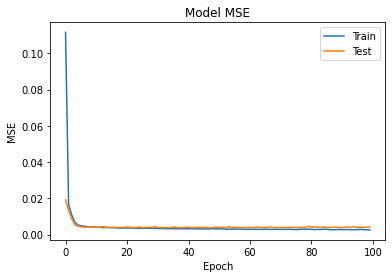

In [385]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [386]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

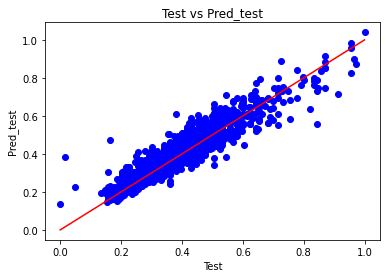

In [387]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

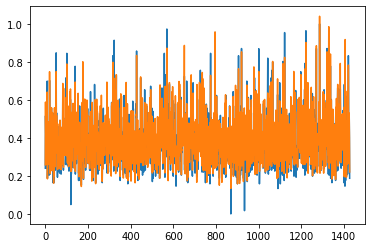

In [388]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [389]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

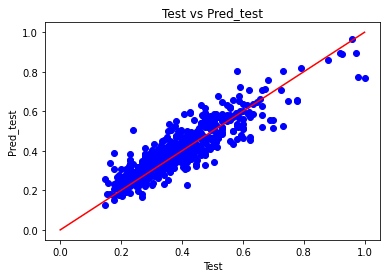

In [390]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

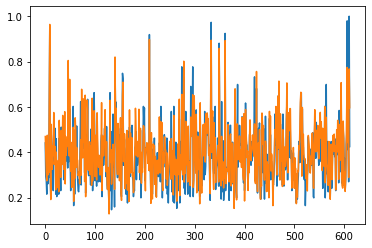

In [391]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [392]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(numpy.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(numpy.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.05177298748736058
0.0642461986587138


In [393]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9602373242378235, p = 2.5901726240723165e-19
Test k = 0.9798344969749451, p = 1.8252937650231615e-07


In [394]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9664037227630615, p_s = 2.1219852469723917e-21
k_n = 165.16934743438654, p_n = 1.3612312629683055e-36


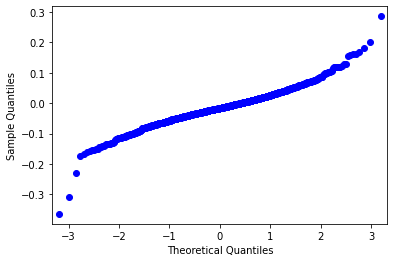

In [395]:
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

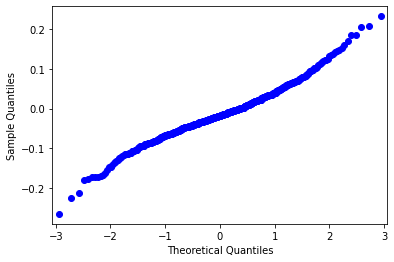

In [396]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

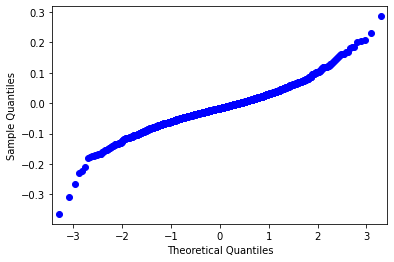

In [397]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

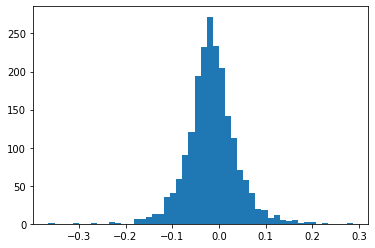

In [398]:
# Можо также визульно убедиться, что распределения "почти нормальное".
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [399]:
model.save('SimpleNeuralNetworkNumber1.h5')